## Prepared and submitted by: Surendra Prakash Shukla

<b>Data Description:</b> <br>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. <br> <br>
<b>Domain:</b><br>
Banking<br><br>
<b>Context:</b><br>
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.<br><br>
<b>Attribute Information:</b>
1. age (numeric)<br>
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5. default: has credit in default? (categorical: 'no','yes','unknown')<br>
6. balance: average yearly balance, in euros (numeric)<br>
7. housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8. loan: has personal loan? (categorical: 'no','yes','unknown')<br>
9. contact: contact communication type (categorical: 'cellular','telephone')<br>
10. day: last contact day of the month (numeric 1 -31)<br>
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")<br><br>
<b>Learning Outcomes:</b><br>
Exploratory Data Analysis<br>
Preparing the data to train a model<br>
Training and making predictions using an Ensemble Model<br>
Tuning an Ensemble model<br><br>
<b>Objective:</b><br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Import Libraries and read Dataset. Check the shape, info of the dataset

In [1]:
# Import necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
#Library to plot decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO; 
from IPython.display import Image  
import pydotplus
import graphviz
#Library for Data Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#Traditional Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Decision Tree and other Ensemble Techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
#Library for Model Evaluation 
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
#Other Libraries
from collections import Counter
from scipy import stats
from matplotlib.colors import ListedColormap



C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
#Define couple of variables which would be used lated in the program 
threshold_range = np.arange(.1,.9,.1) # A range of threshold value, which will be used to calculate best value
all_threshold = [] #list of best threshold value for different classification models. 

In [4]:
#Read the Dataset in a Dataframe
customer_df = pd.read_csv('bank-full.csv')

In [5]:
#Print Columns, and Shape
print(customer_df.columns)
print('')
print('Total Rows = {}'.format(customer_df.shape[0]))
print('Total Cols = {}'.format(customer_df.shape[1]))

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

Total Rows = 45211
Total Cols = 17


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Observation: 
1. There are 45211 rows and 17 columns. One of the column is Dependent column (Target) and rest columns are Independent columns.

In [7]:
#Check the Head
customer_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


<b>Observation </b> <br> 1. There are many unknown, which says we have missing values in this dataset. <br> 2.
We will see how to treat the missing values.
    

### Define Functions to be used in this program

In [8]:
#This function creates a DataFrame with model evaluation metrics
def model_evalution_function(X_test, y_test, model, method, plot=False):
    
    """ This function calcualtes the Classification model evalution metrics, 
    stored them in a dataframe and rerurn this dataframe
    INPUT - X_test, y_test, model
    Output - Model evaluation (accuracy, F1score, Recall, Precision and AUC)"""
    max_f1score = 0
    max_threshold = 0
    # Loop through all threshold value from .1 to .9, and pick the one with best f1-score
    for thres in threshold_range:
        y_predict = np.where(model.predict_proba(X_test)[:,1] > thres, 1, 0)
        f1score = f1_score(y_test,y_predict, average = 'weighted')
        
        if f1score > max_f1score:
            max_f1score = f1score
            max_threshold = thres
    all_threshold.append(max_threshold)  #add this threshold to a universal list of all models
    
    #Calculate model metrics
    
    y_predict = np.where(model.predict_proba(X_test)[:,1] > max_threshold, 1, 0)
    dt_accuracy = accuracy_score(y_test,y_predict)
    dt_f1score = f1_score(y_test,y_predict, average='weighted')
    dt_recall = recall_score(y_test, y_predict, average='weighted')
    dt_precision = precision_score(y_test, y_predict, average='weighted')
    #ROC and AUC
    roc_auc = roc_auc_score(y_test, y_predict, average = 'weighted')
    model_evalution = pd.DataFrame({'Method':[method],
                                    'Threshold': max_threshold,
                                    'Accuracy':dt_accuracy,
                                    'F1-Score':dt_f1score,
                                    'Recall': dt_recall,
                                    'precision': dt_precision,
                                    'AUC': roc_auc
                                   })
    return model_evalution

In [9]:
# Check Outliers
def find_outlier(data,name):
    """ This Function counts and prints outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = None """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    print (' {} = There are total {} ({:0.2f}%) outliers'.format(name,
                                                len(outlier), 
                                                len(outlier)*100/len(data)))

In [10]:
def return_outlier(data):
    """ This Function finds the outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = The outliers in a List """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    return outlier

### Check Missing values and outliers

In [11]:
#Check the missing value in all columns
print('Missing Value in Categorical Columns')
print('====================================')
for cols in customer_df.columns:
    if customer_df[cols].dtype == 'object':
        print('Unknown in {} column is = {} ({:0.2f}%)'.format
                      (cols,len(customer_df[customer_df[cols] == 'unknown']),
                       len(customer_df[customer_df[cols] == 'unknown'])*100/len(customer_df.index))) 
        
print('')
print('Missing Value in Continous Columns')
print('====================================')
for cols in customer_df.columns:
    if customer_df[cols].dtype == 'int64':
        print('Zero in {} column is = {} ({:0.2f}%), Negative is = {} ({:0.2f}%) '.format
                      (cols,len(customer_df[customer_df[cols] == 0]),
                       len(customer_df[customer_df[cols] == 0])*100/len(customer_df.index),
                       len(customer_df[customer_df[cols] < 0]),
                       len(customer_df[customer_df[cols] < 0])*100/len(customer_df.index),                      
                      )) 

print('')
print('Outliers in continous columns')
print('====================================')
#Find outliers
i=-1
for cols in customer_df.columns:
    i = i + 1
   
    if customer_df[cols].dtype == 'int64':
        find_outlier(customer_df[cols],customer_df.columns[i])
       

   

Missing Value in Categorical Columns
Unknown in job column is = 288 (0.64%)
Unknown in marital column is = 0 (0.00%)
Unknown in education column is = 1857 (4.11%)
Unknown in default column is = 0 (0.00%)
Unknown in housing column is = 0 (0.00%)
Unknown in loan column is = 0 (0.00%)
Unknown in contact column is = 13020 (28.80%)
Unknown in month column is = 0 (0.00%)
Unknown in poutcome column is = 36959 (81.75%)
Unknown in Target column is = 0 (0.00%)

Missing Value in Continous Columns
Zero in age column is = 0 (0.00%), Negative is = 0 (0.00%) 
Zero in balance column is = 3514 (7.77%), Negative is = 3766 (8.33%) 
Zero in day column is = 0 (0.00%), Negative is = 0 (0.00%) 
Zero in duration column is = 3 (0.01%), Negative is = 0 (0.00%) 
Zero in campaign column is = 0 (0.00%), Negative is = 0 (0.00%) 
Zero in pdays column is = 0 (0.00%), Negative is = 36954 (81.74%) 
Zero in previous column is = 36954 (81.74%), Negative is = 0 (0.00%) 

Outliers in continous columns
 age = There are tota

### Observation:
1. There are missing values in 'poutcome', 'contact', education', and 'job' columns.
2. There are negative values in pdays, but this should be acceptable as -1 denotes that this person was not contacted earlier.
3. I am not replacing -1 with 999 (as given in the documentation), because there is a risk of taking 999 as extreme outlier which might have an impact on model performance. 
4. There are outliers in different columns. 
5. I am going to treat outlier in 'balance' column only, as in other column the outliers are probably coming from the fact that
the person has never been contacted earlier. 

### Outliers Treatment by Log Transformation

In [12]:
# Log transformation of columns to remove (reduce) number of outliers. 
customer_df['balance_log']= customer_df['balance'].apply(lambda x: np.log10(x) if x > 0 else 0)
#customer_df['campaign_log']= customer_df['campaign'].apply(lambda x: np.log10(x) if x > 0 else 0)
#customer_df['pdays_log']= customer_df['pdays'].apply(lambda x: np.log10(x) if x > 0 else 0)
#customer_df['previous_log']= customer_df['previous'].apply(lambda x: np.log10(x) if x > 0 else 0)


In [13]:
print('Outliers in continous columns after log_transformation columns')
print('====================================')
#Find outliers
i=-1
for cols in customer_df.columns:
    i = i + 1
   
    if customer_df[cols].dtype == 'float64':
        find_outlier(customer_df[cols],customer_df.columns[i])

Outliers in continous columns after log_transformation columns
 balance_log = There are total 0 (0.00%) outliers


### Observation:
1. Log transformation removed the outlier from balance column. 
    

### Missing Value Treatment

In [14]:
#replace all 'unknown' with null value
customer_df.replace('unknown',np.nan,inplace=True);
customer_df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
Target             0
balance_log        0
dtype: int64

In [15]:
#Impute Missing Values in job, education and contacnt columns with most frequent
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer = imputer.fit(customer_df[['job','education','contact']])
customer_df[['job','education','contact']] = imputer.transform(customer_df[['job','education','contact']] )


In [16]:
#If there are no contact in previous campaign (previous = 0), then previous outcome(poutcome) 
# should be 'other'. (Neither success not failure)
#customer_df.loc[(customer_df['previous'] == 0) & (customer_df['poutcome'] == np.nan),'poutcome'] = 'other'
customer_df['poutcome'].replace(np.nan,'other',inplace=True)

In [17]:
#Check the dataset after missing value treatment
customer_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,balance_log
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,other,no,3.331022
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,other,no,1.462398
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,other,no,0.301030
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,other,no,3.177825
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,other,no,0.000000


### Exploratory Data Analysis

In [18]:
print ('Total Person Subscribed to Term Deposit = {} ({:0.2f}%) '.format(len(customer_df[customer_df['Target'] == 'yes']),
                                              len(customer_df[customer_df['Target'] == 'yes'])*100/len(customer_df.index)
                                              ))                                         
                                            

Total Person Subscribed to Term Deposit = 5289 (11.70%) 


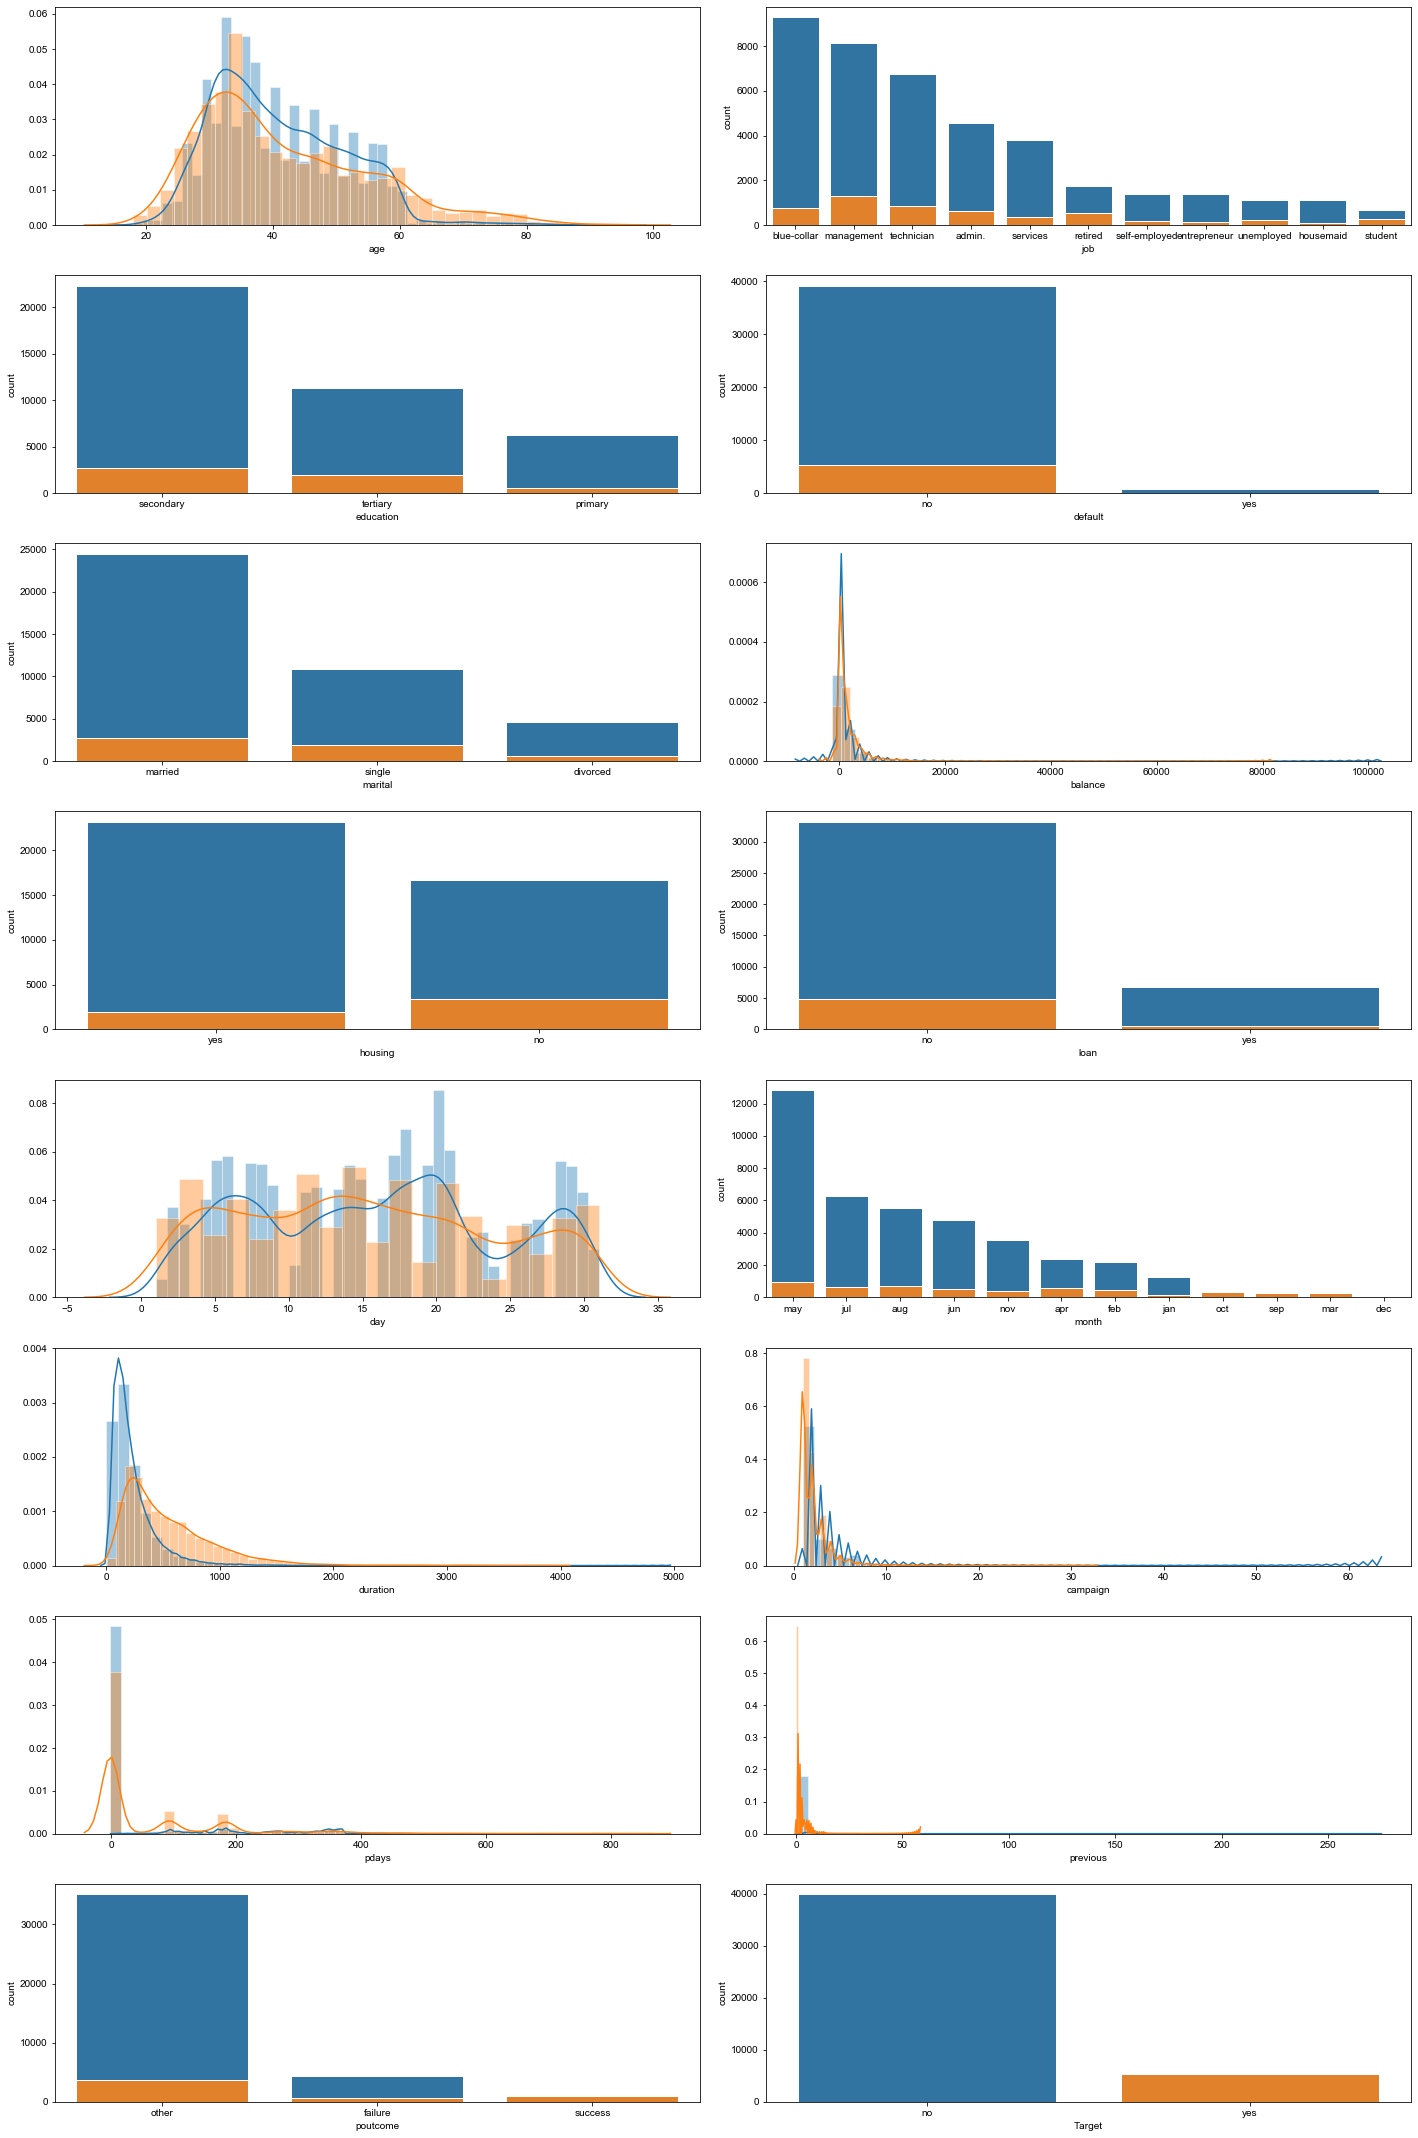

In [19]:
# Univariant Analysis - Distribution of all variables across 'Target'  

fig, ax = plt.subplots(8,2, figsize=(20,30))


fg = sns.FacetGrid(customer_df, hue='Target', height=3)
sns.set(font_scale=1.4)
fg.map(sns.distplot, 'age', ax=ax[0,0], label='Age')
fg.map(sns.countplot, 'job', ax=ax[0,1], label='job',order = customer_df['job'].value_counts().index)
fg.map(sns.countplot, 'education', ax=ax[1,0], label='Education',order = customer_df['education'].value_counts().index)
fg.map(sns.countplot, 'default', ax=ax[1,1], label='Default',order = customer_df['default'].value_counts().index)
fg.map(sns.countplot, 'marital', ax=ax[2,0], label='Marital',order = customer_df['marital'].value_counts().index)
fg.map(sns.distplot, 'balance', ax=ax[2,1], label='balance')
fg.map(sns.countplot, 'housing', ax=ax[3,0], label='housing',order = customer_df['housing'].value_counts().index)
fg.map(sns.countplot, 'loan', ax=ax[3,1], label='loan',order = customer_df['loan'].value_counts().index)
fg.map(sns.distplot, 'day', ax=ax[4,0], label='day')
fg.map(sns.countplot, 'month', ax=ax[4,1], label='month',order = customer_df['month'].value_counts().index)
fg.map(sns.distplot, 'duration', ax=ax[5,0], label='duration')
fg.map(sns.distplot, 'campaign', ax=ax[5,1], label='campaign')
fg.map(sns.distplot, 'pdays', ax=ax[6,0], label='pdays')
fg.map(sns.distplot, 'previous', ax=ax[6,1], label='previous')
fg.map(sns.countplot, 'poutcome', ax=ax[7,0], label='poutcome',order = customer_df['poutcome'].value_counts().index)
fg.map(sns.countplot, 'Target', ax=ax[7,1], label='Target',order = customer_df['Target'].value_counts().index)


plt.close(2)
plt.tight_layout()
plt.show()

### Observation:
1. It does not appear to have much variation between people who have opted for Term Deposit and who have not, based on their age, last contact day and last contact month. 
2. Divoreced people have not subscribed to Term Deposit. 
3. People with higher education (Secondary and Tertiary) tend to subsribe. 
4. Person with no housing or personal loan appear to have more chances of subcribing to term deposit. 
5. Duration of contact has major impact. More the duration, more the chances of person subscribing to loan. 

### Encode Categorical Variables

In [20]:
#Print dataframe head before label encoding
customer_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,balance_log
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,other,no,3.331022
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,other,no,1.462398
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,other,no,0.301030
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,other,no,3.177825
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,other,no,0.000000


In [21]:
#Label encoder

label_encoder = LabelEncoder()
customer_df['job'] = label_encoder.fit_transform(customer_df['job'])
customer_df['marital'] = label_encoder.fit_transform(customer_df['marital'])
customer_df['education'] = label_encoder.fit_transform(customer_df['education'])
customer_df['default'] = label_encoder.fit_transform(customer_df['default'])
customer_df['housing'] = label_encoder.fit_transform(customer_df['housing'])
customer_df['loan'] = label_encoder.fit_transform(customer_df['loan'])
customer_df['poutcome'] = label_encoder.fit_transform(customer_df['poutcome'])
customer_df['Target'] = label_encoder.fit_transform(customer_df['Target'])
customer_df['contact'] = label_encoder.fit_transform(customer_df['contact'])
#For month, I have done a manual encoding to preserve the sequence
customer_df['month'].replace('jan',1,inplace=True)
customer_df['month'].replace('feb',2,inplace=True)
customer_df['month'].replace('mar',3,inplace=True)
customer_df['month'].replace('apr',4,inplace=True)
customer_df['month'].replace('may',5,inplace=True)
customer_df['month'].replace('jun',6,inplace=True)
customer_df['month'].replace('jul',7,inplace=True)
customer_df['month'].replace('aug',8,inplace=True)
customer_df['month'].replace('sep',9,inplace=True)
customer_df['month'].replace('oct',10,inplace=True)
customer_df['month'].replace('nov',11,inplace=True)
customer_df['month'].replace('dec',12,inplace=True)




In [22]:
#print dataframe head after label encoding
customer_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,balance_log
0,58,4,1,2,0,2143,1,0,0,5,5,261,1,-1,0,1,0,3.331022
1,44,9,2,1,0,29,1,0,0,5,5,151,1,-1,0,1,0,1.462398
2,33,2,1,1,0,2,1,1,0,5,5,76,1,-1,0,1,0,0.301030
3,47,1,1,1,0,1506,1,0,0,5,5,92,1,-1,0,1,0,3.177825
4,33,1,2,1,0,1,0,0,0,5,5,198,1,-1,0,1,0,0.000000


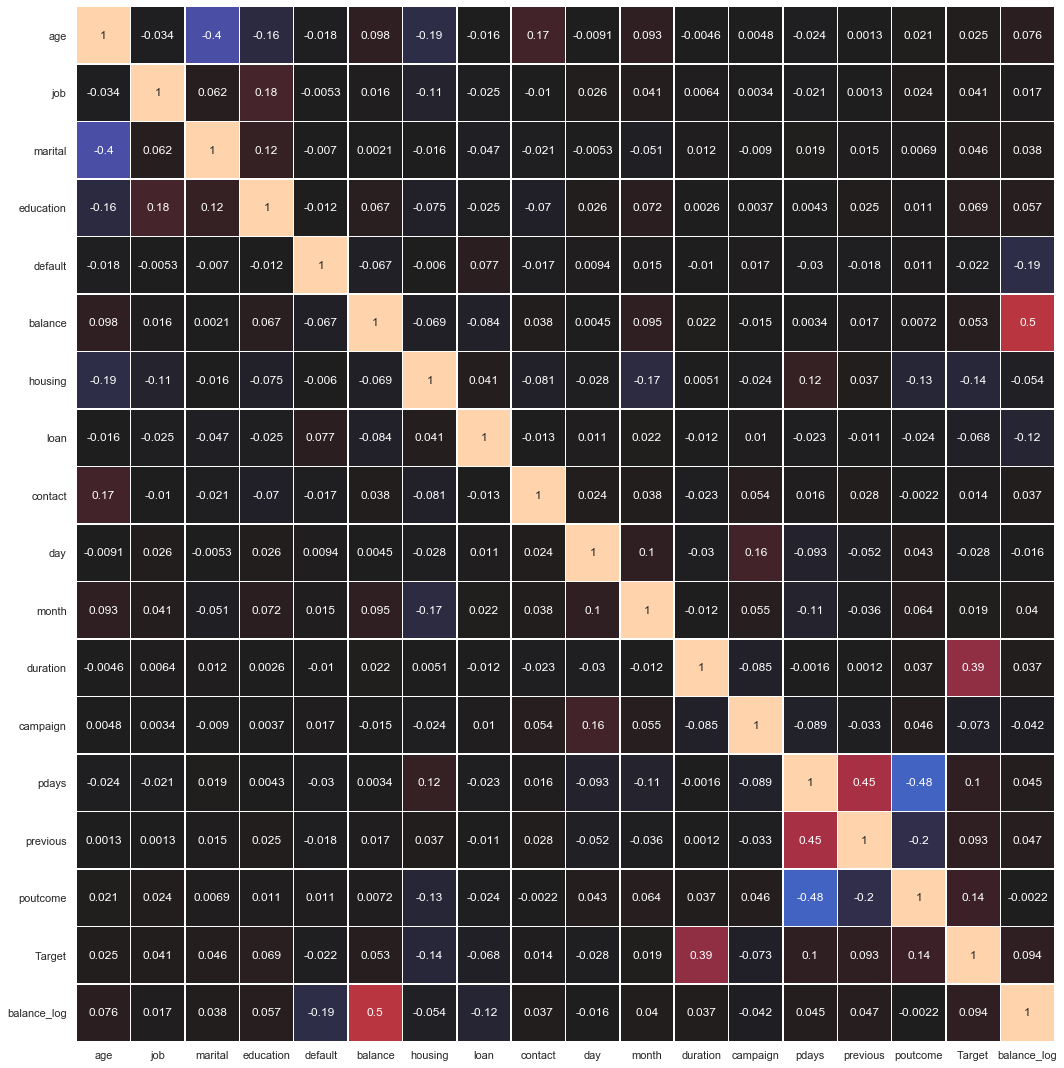

In [23]:
#Check the correlation of different values with Target column
sns.set(font_scale=1)
plt.figure(figsize=(15,15))
ax = sns.heatmap(customer_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

### Observation:
1. Only significant positive correlation with Target variable is seen with duration (coef = .39), poutcome (coef = .14) and pdays (coef = 0.1)
2. Only significant negative correlation is see with housing loan (coef = -.14)
3. All other features have weak correlation with target (coef < 0.1) 

### Check Data after Missing Value Treatment

In [24]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age            45211 non-null int64
job            45211 non-null int32
marital        45211 non-null int32
education      45211 non-null int32
default        45211 non-null int32
balance        45211 non-null int64
housing        45211 non-null int32
loan           45211 non-null int32
contact        45211 non-null int32
day            45211 non-null int64
month          45211 non-null int64
duration       45211 non-null int64
campaign       45211 non-null int64
pdays          45211 non-null int64
previous       45211 non-null int64
poutcome       45211 non-null int32
Target         45211 non-null int32
balance_log    45211 non-null float64
dtypes: float64(1), int32(9), int64(8)
memory usage: 4.7 MB


In [25]:
customer_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
Target         0
balance_log    0
dtype: int64

### Observation:
There are no missing values now. 

In [26]:
#Convert the datatype to categorical variables
customer_df['job'] = customer_df['job'].astype('category')
customer_df['marital'] = customer_df['marital'].astype('category')
customer_df['education'] = customer_df['education'].astype('category')
customer_df['default'] = customer_df['default'].astype('category')
customer_df['housing'] = customer_df['housing'].astype('category')
customer_df['loan'] = customer_df['loan'].astype('category')
customer_df['poutcome'] = customer_df['poutcome'].astype('category')
customer_df['Target'] = customer_df['Target'].astype('category')
customer_df['month'] = customer_df['month'].astype('category')

In [27]:
customer_df[customer_df['Target'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,39922.0,40.838986,10.172662,18.0,33.000000,39.000000,48.000000,95.000000
balance,39922.0,1303.714969,2974.195473,-8019.0,58.000000,417.000000,1345.000000,102127.000000
contact,39922.0,0.063023,0.243007,0.0,0.000000,0.000000,0.000000,1.000000
day,39922.0,15.892290,8.294728,1.0,8.000000,16.000000,21.000000,31.000000
duration,39922.0,221.182806,207.383237,0.0,95.000000,164.000000,279.000000,4918.000000
campaign,39922.0,2.846350,3.212767,1.0,1.000000,2.000000,3.000000,63.000000
pdays,39922.0,36.421372,96.757135,-1.0,-1.000000,-1.000000,-1.000000,871.000000
previous,39922.0,0.502154,2.256771,0.0,0.000000,0.000000,0.000000,275.000000
balance_log,39922.0,2.262194,1.227240,0.0,1.763428,2.620136,3.128722,5.009141


In [28]:
customer_df[customer_df['Target'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.000000,38.000000,50.000000,95.000000
balance,5289.0,1804.267915,3501.104777,-3058.0,210.000000,733.000000,2159.000000,81204.000000
contact,5289.0,0.073738,0.261369,0.0,0.000000,0.000000,0.000000,1.000000
day,5289.0,15.158253,8.501875,1.0,8.000000,15.000000,22.000000,31.000000
duration,5289.0,537.294574,392.525262,8.0,244.000000,426.000000,725.000000,3881.000000
campaign,5289.0,2.141047,1.921826,1.0,1.000000,2.000000,3.000000,32.000000
pdays,5289.0,68.702968,118.822266,-1.0,-1.000000,-1.000000,98.000000,854.000000
previous,5289.0,1.170354,2.553272,0.0,0.000000,0.000000,1.000000,58.000000
balance_log,5289.0,2.619042,1.071229,0.0,2.322219,2.865104,3.334253,4.909577


### Observation: 
1. People who have subscribed to Term deposit have more balance (avg = 1303 for non subsriber vs 1804 for subsribers)
2. Number of previous contacts are almost double for people who subscribed vs not subscribed (avg = 1.17 vs .50)
3. Interstingly, pdays as inverse impact i.e. days passed since last contant may not have major impact. What matters is how many times a person is contacted for their decision to subscribe or not. 
4. Duration of contact has major variation (avg = 221 for non-subscriber vs 537 for subscribers)
5. based on this, it appears most impact is due to duration, previous and pdays (same observation is seen earlier with correlation heatmap)

### Split the Dataset between Train and Test with 30% split

In [29]:
#Create X (indepedent) and y (dependent) datasets
X = customer_df.drop(['Target','balance'],axis=1)
y = customer_df['Target']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.30, random_state=20)

X_train.shape,X_test.shape

((31647, 16), (13564, 16))

In [30]:

print ('Total Person Subscribed to Term Deposit                = {} ({:0.2f}%) '.format(len(customer_df[customer_df['Target'] == 1]),
                                              len(customer_df[customer_df['Target'] == 1])*100/len(customer_df.index)
                                              ))  
print('Total Person Subscribed to Term Deposit in Training Set = {} ({:0.2f}%)'.format(Counter(y_train)[1], 
                                                                 Counter(y_train)[1]/len(y_train) * 100))
print('Total Person Subscribed to Term Deposit in Testing Set  = {} ({:0.2f}%)'.format(Counter(y_test)[1], 
                                                                Counter(y_test)[1]/len(y_test) * 100))

Total Person Subscribed to Term Deposit                = 5289 (11.70%) 
Total Person Subscribed to Term Deposit in Training Set = 3731 (11.79%)
Total Person Subscribed to Term Deposit in Testing Set  = 1558 (11.49%)


## Traditional Classification Models

### Logistic Regression

In [31]:
log_r_model = LogisticRegression(solver="liblinear")
log_r_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(log_r_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(log_r_model.score(X_test,y_test)))

Accuracy Score for Training Set = 0.90
Accuracy Score for Testing Set = 0.90


In [33]:
all_model_metrics = model_evalution_function(X_test, y_test, log_r_model, method = 'Logistic Regression')
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984


### KNN Classifier

In [34]:
#For KNN, first scale the data
std_scale = StandardScaler()
std_columns = X_train.columns

X_train_scaled = pd.DataFrame(std_scale.fit_transform(X_train))
X_test_scaled = pd.DataFrame(std_scale.fit_transform(X_test))

X_train_scaled.columns = std_columns
X_test_scaled.columns = std_columns


In [35]:
#running two models with k=3 and k=5
knn_model_3 = KNeighborsClassifier(n_neighbors= 3)
knn_model_3.fit(X_train_scaled, y_train)
knn_model_5 = KNeighborsClassifier(n_neighbors= 5)
knn_model_5.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set KNN with 3 Neighbours = {0:0.2f}'.format(knn_model_3.score(X_train_scaled,y_train)))
print('Accuracy Score for Testing Set KNN with 3 Neighbours = {0:0.2f}'.format(knn_model_3.score(X_test_scaled,y_test)))
print('Accuracy Score for Training Set KNN with 5 Neighbours = {0:0.2f}'.format(knn_model_5.score(X_train_scaled,y_train)))
print('Accuracy Score for Testing Set KNN with 5 Neighbours = {0:0.2f}'.format(knn_model_5.score(X_test_scaled,y_test)))

Accuracy Score for Training Set KNN with 3 Neighbours = 0.93
Accuracy Score for Testing Set KNN with 3 Neighbours = 0.89
Accuracy Score for Training Set KNN with 5 Neighbours = 0.92
Accuracy Score for Testing Set KNN with 5 Neighbours = 0.90


In [37]:
metrics = model_evalution_function(X_test_scaled, y_test, knn_model_3, 'KNN with K=3')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics



,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184


In [38]:
metrics = model_evalution_function(X_test_scaled, y_test, knn_model_5, 'KNN with K=5')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928


### Naive Bayes Model

In [39]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(nb_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(nb_model.score(X_test,y_test)))

Accuracy Score for Training Set = 0.85
Accuracy Score for Testing Set = 0.85


In [41]:
metrics = model_evalution_function(X_test, y_test, nb_model, 'Naive Bayes')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
0,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127


### Ensemble Models - Decision Tree

In [42]:
dt_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [43]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(dt_pruned.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(dt_pruned.score(X_test,y_test)))

Accuracy Score for Training Set = 0.90
Accuracy Score for Testing Set = 0.91


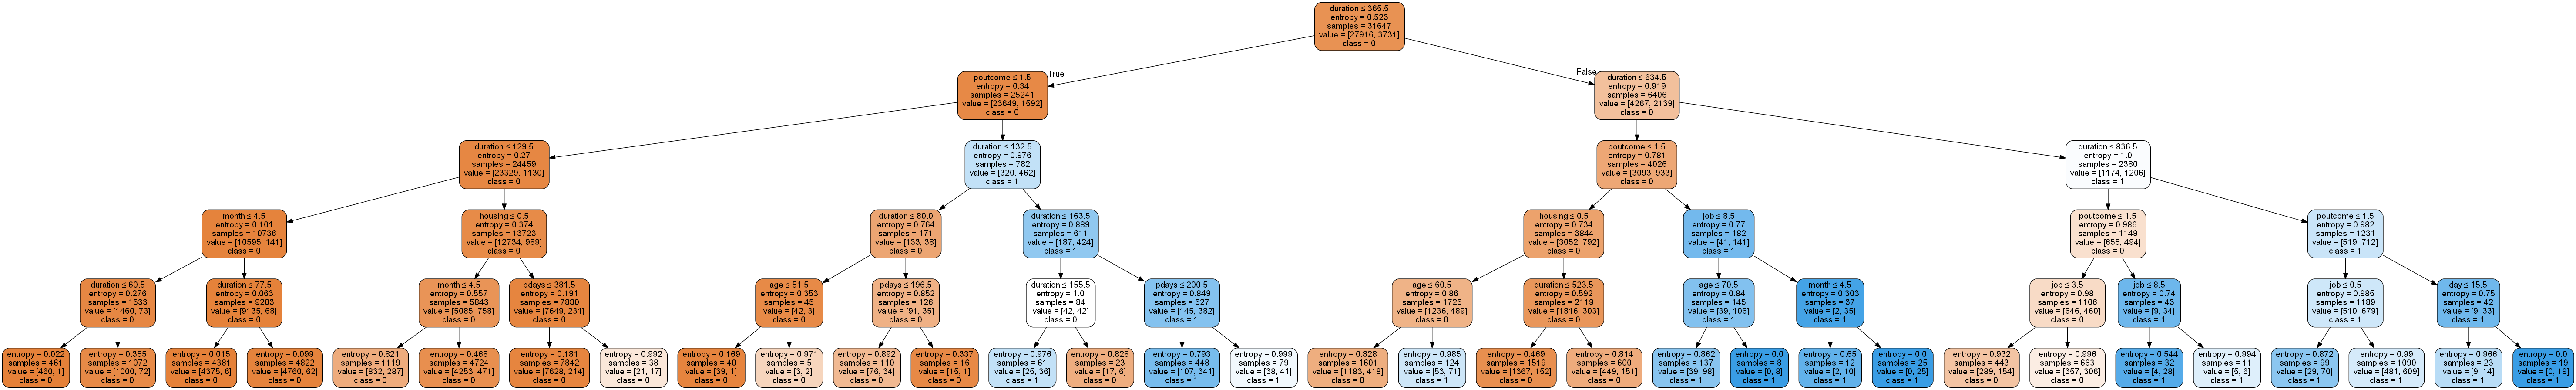

In [44]:
#Plot the tree
Xvar = X
feature_cols = Xvar.columns
dot_data = StringIO()
export_graphviz(dt_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt_pruned.png')
Image(graph.create_png())

In [45]:
metrics = model_evalution_function(X_test, y_test, dt_pruned, 'Decision Tree')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
0,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127
0,Decision Tree,0.4,0.899956,0.894031,0.899956,0.890595,0.702749


### Feature Selection for Decision Tree

In [46]:
feat_importance = dt_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dt_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.585860
poutcome,0.263426
housing,0.084530
month,0.038655
pdays,0.012628
age,0.008123
job,0.005044
day,0.001734
marital,0.000000
education,0.000000


### Random Forest Model

In [47]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(rf_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(rf_model.score(X_test,y_test)))

Accuracy Score for Training Set = 1.00
Accuracy Score for Testing Set = 0.91


In [49]:
metrics = model_evalution_function(X_test,y_test, rf_model, 'Random Forest')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
0,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127
0,Decision Tree,0.4,0.899956,0.894031,0.899956,0.890595,0.702749
0,Random Forest,0.4,0.904232,0.903922,0.904232,0.903620,0.761299


### Adaboost Classifier

In [50]:
ab_model = AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22)
ab_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=22)

In [51]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(ab_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(ab_model.score(X_test,y_test)))

Accuracy Score for Training Set = 0.89
Accuracy Score for Testing Set = 0.90


In [52]:
metrics = model_evalution_function(X_test,y_test, ab_model, 'Adaboost Classifier')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spshu\Anaconda3\lib\site-packages\sklearn\metrics\c

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
0,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127
0,Decision Tree,0.4,0.899956,0.894031,0.899956,0.890595,0.702749
0,Random Forest,0.4,0.904232,0.903922,0.904232,0.903620,0.761299
0,Adaboost Classifier,0.5,0.899661,0.874154,0.899661,0.884416,0.598411


### Gradient Boost Classifier

In [53]:
gb_model = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1, random_state=22)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=22, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(gb_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(gb_model.score(X_test,y_test)))

Accuracy Score for Training Set = 0.91
Accuracy Score for Testing Set = 0.91


In [55]:
metrics = model_evalution_function(X_test,y_test, gb_model, 'Gradient Boost Classifier')
all_model_metrics = pd.concat([all_model_metrics,metrics])
all_model_metrics

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
0,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
0,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
0,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127
0,Decision Tree,0.4,0.899956,0.894031,0.899956,0.890595,0.702749
0,Random Forest,0.4,0.904232,0.903922,0.904232,0.903620,0.761299
0,Adaboost Classifier,0.5,0.899661,0.874154,0.899661,0.884416,0.598411
0,Gradient Boost Classifier,0.4,0.906296,0.903054,0.906296,0.900757,0.737889


### Bagging Classifier

In [56]:
bag_model = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=100,
                  n_jobs=None, oob_score=True, random_state=22, verbose=0,
                  warm_start=False)

In [57]:
#Print accuracy score with training and testing dataset to check underfit, overfit of the model
print('Accuracy Score for Training Set = {0:0.2f}'.format(bag_model.score(X_train,y_train)))
print('Accuracy Score for Testing Set = {0:0.2f}'.format(bag_model.score(X_test,y_test)))

Accuracy Score for Training Set = 1.00
Accuracy Score for Testing Set = 0.90


In [58]:
metrics = model_evalution_function(X_test,y_test, bag_model, 'Bagging Classifier')
all_model_metrics = pd.concat([all_model_metrics,metrics])



In [59]:
#Print score of all models
all_model_metrics.sort_values(by='F1-Score',ascending=False).reset_index(drop=True)

,Method,Threshold,Accuracy,F1-Score,Recall,precision,AUC
0,Bagging Classifier,0.4,0.902610,0.904258,0.902610,0.906162,0.778257
1,Random Forest,0.4,0.904232,0.903922,0.904232,0.903620,0.761299
2,Gradient Boost Classifier,0.4,0.906296,0.903054,0.906296,0.900757,0.737889
3,Logistic Regression,0.3,0.897965,0.894383,0.897965,0.891716,0.716984
4,Decision Tree,0.4,0.899956,0.894031,0.899956,0.890595,0.702749
5,Naive Bayes,0.8,0.890961,0.885845,0.890961,0.882224,0.690127
6,KNN with K=5,0.4,0.895680,0.883868,0.895680,0.879853,0.655928
7,KNN with K=3,0.4,0.890519,0.881691,0.890519,0.876887,0.664184
8,Adaboost Classifier,0.5,0.899661,0.874154,0.899661,0.884416,0.598411


#### Observation
Total 8 models, at the best threshold value are given above. 
1. Comparing F1 score, Random Forest, bagging and gradient boost are among the best performing model (F1-score = .90)
2. Adaboost is worst performing model with F1score = .874
3. Bagging classifier has best AUC.
4. I will try to interpret these results with further with confusion matrix and classification report. 

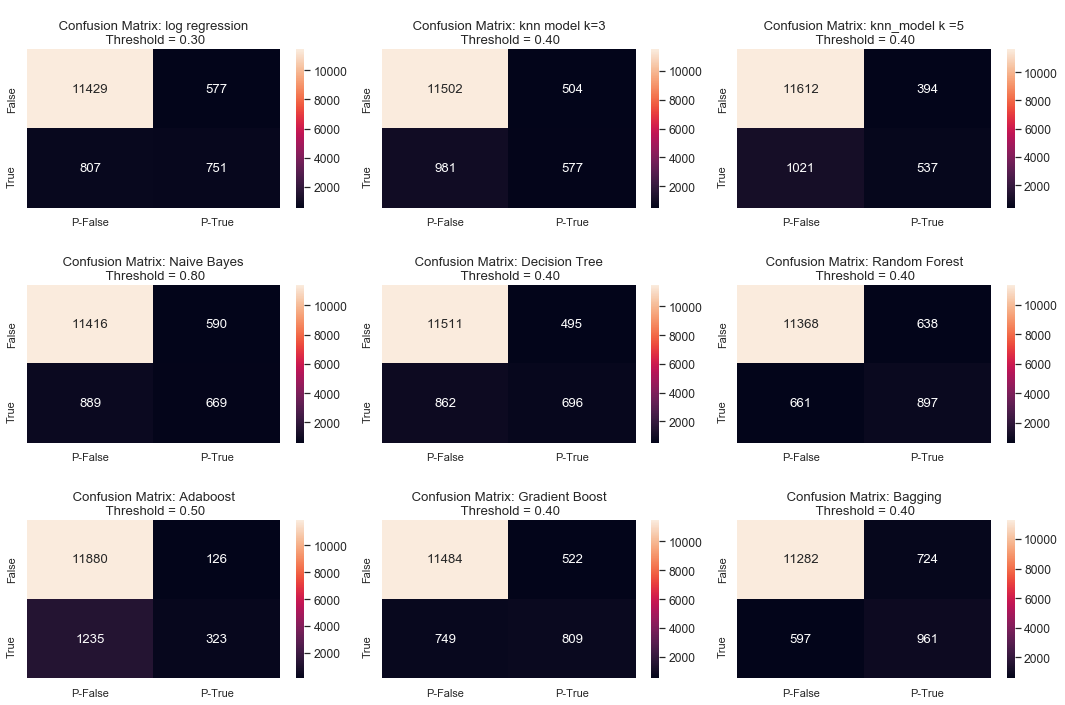

In [60]:
#Print Confusion Matrix for all models
all_models_name = ['log regression', 'knn model k=3', 'knn_model k =5', 'Naive Bayes', 'Decision Tree', 
              'Random Forest', 'Adaboost', 'Gradient Boost', 'Bagging']
all_models = [log_r_model, knn_model_3, knn_model_5, nb_model, dt_pruned, rf_model, ab_model, gb_model, bag_model]


fig, ax =plt.subplots(3,3, figsize=(15,10))
sns.set(font_scale=1.1)
idx  = 0
for row in range(0,3):
    for cols in range(0,3):
        
        if all_models_name[idx][0:3] == 'knn':
            model_cm=confusion_matrix(y_test, 
                                      np.where(all_models[idx].predict_proba(X_test_scaled)[:,1] > 
                                               all_threshold[idx] ,1,0),
                                      labels=[0, 1])
            df_cm = pd.DataFrame(model_cm, index = [i for i in ["False","True"]],
                              columns = [i for i in ["P-False","P-True"]])
        else:
            model_cm=confusion_matrix(y_test, 
                                      np.where(all_models[idx].predict_proba(X_test)[:,1] > 
                                               all_threshold[idx], 1,0),
                                      labels=[0, 1])
            
            df_cm = pd.DataFrame(model_cm, index = [i for i in ["False","True"]],
                              columns = [i for i in ["P-False","P-True"]])

        sns.heatmap(df_cm, annot=True, fmt = '1',ax=ax[row,cols])

        bottom, top = ax[row,cols].get_ylim()
        ax[row,cols].set_ylim(bottom + 0.5, top - 0.5)
        ax[row,cols].set_title('\n Confusion Matrix: {} \n Threshold = {:0.2f}'.format(all_models_name[idx], 
                                                                                  all_threshold[idx])) 
        plt.tight_layout()
        idx = idx + 1


### Observation
1. Bagging classifier is doing the best job identifying False Negative (597). However, it is slightly worse with False Positive. This model is performing best with True positive class. (best recall in positive class)
2. Adaboost is doing worst job identifyin false negative. It will have low recall value, which I will verify with classification report. 
3. Gradient boost is doing a better job with True negative class. (best recall in negative class)
3. Random Forest has best after combining both classes.

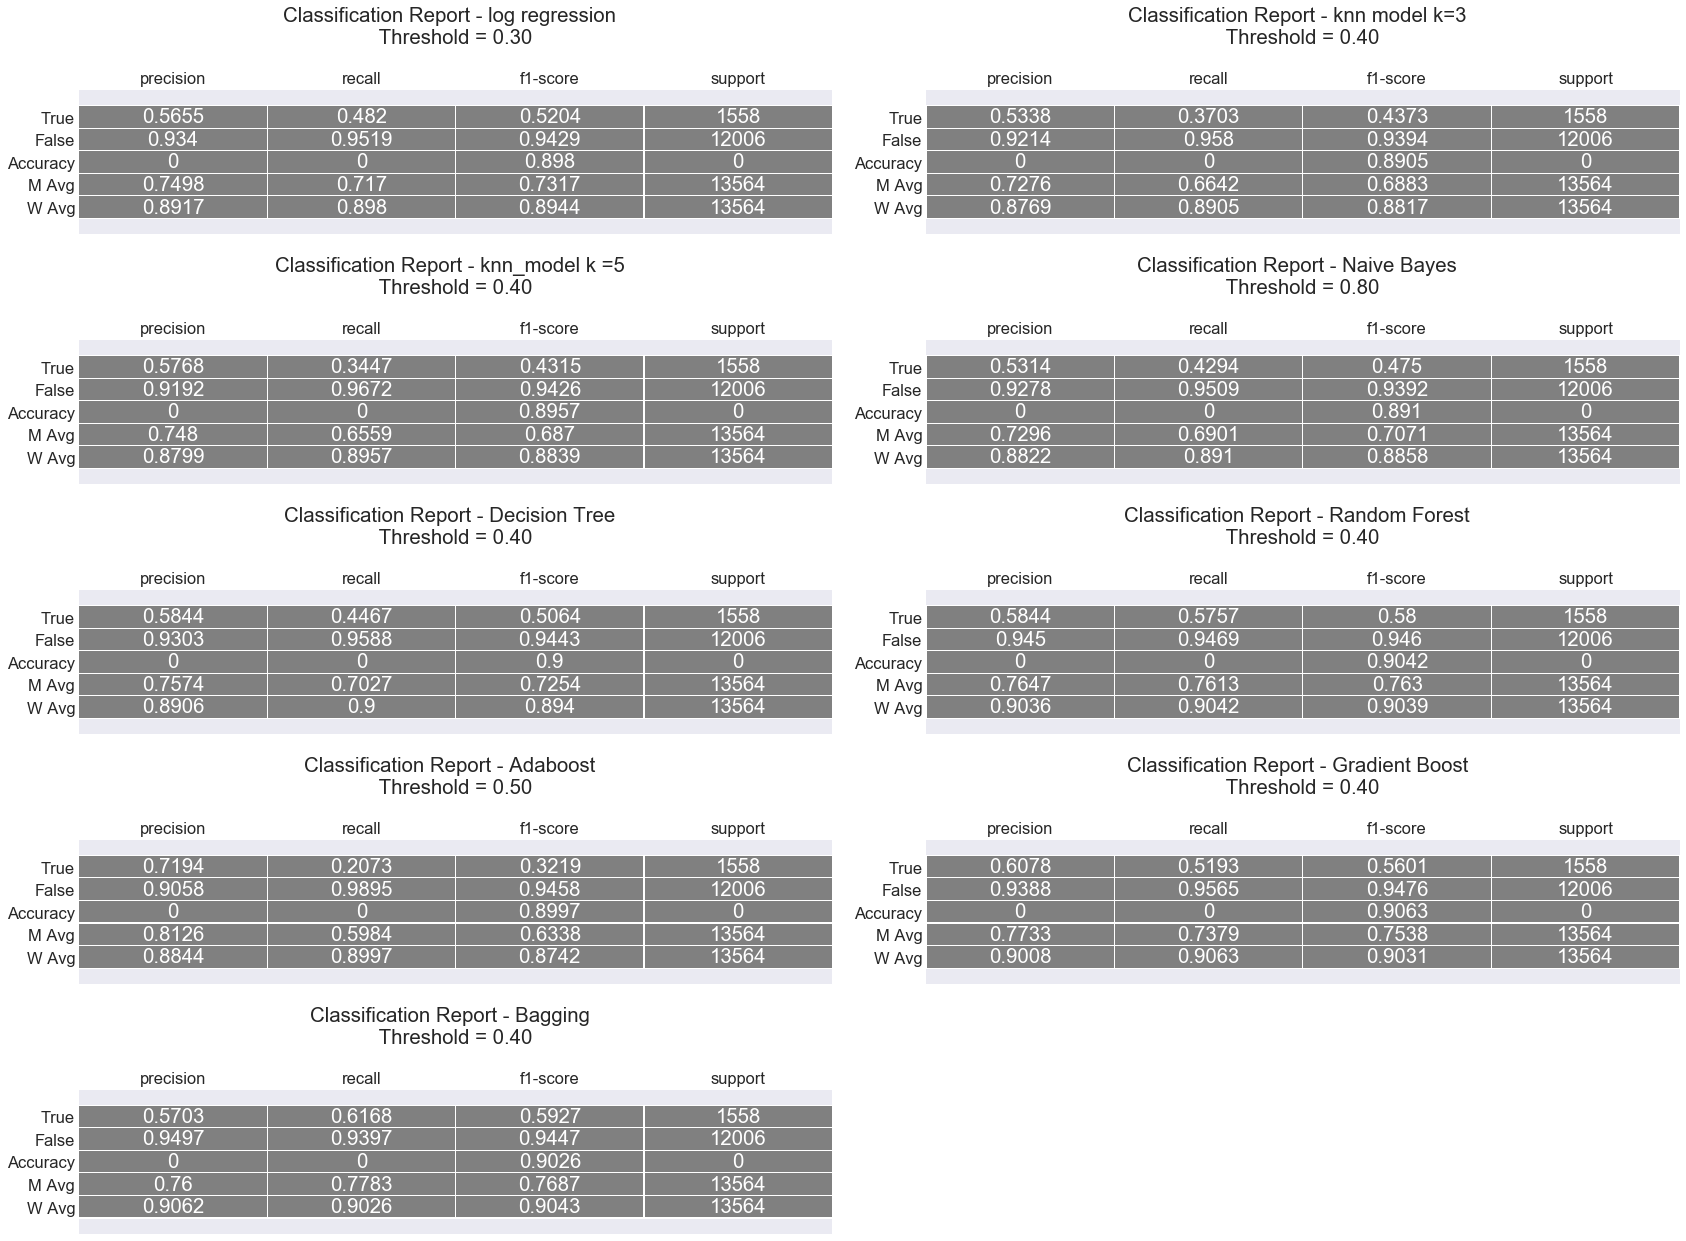

In [63]:
#Print Classification Report for all model
fig, ax =plt.subplots(5,2, figsize=(24,18))
sns.set(font_scale=1.7)
idx  = 0
yticks = ['True','False','Accuracy','M Avg','W Avg']

for row in range(0,5):
    for cols in range(0,2):
        
        if idx < 9:
            
            if all_models_name[idx][0:3] == 'knn':
                report = classification_report(y_test, 
                                               np.where(all_models[idx].predict_proba(X_test_scaled)[:,1] > 
                                                        all_threshold[idx] ,1,0), 
                                               labels=[1,0],output_dict=True,digits=4)
                report = pd.DataFrame(data=report).transpose()
            else:
                report = classification_report(y_test, 
                                               np.where(all_models[idx].predict_proba(X_test)[:,1] > 
                                                        all_threshold[idx] ,1,0), 
                                               labels=[1,0],output_dict=True,digits=4)
                report = pd.DataFrame(data=report).transpose()
            
            report.loc[:,'precision'][2] = 0
            report.loc[:,'recall'][2] = 0
            report.loc[:,'support'][2] = 0
            
            report = report.apply(lambda x: round(x,4))

            sns.heatmap(report,
                            annot=True, 
                            cbar=False, fmt = 'g',
            #               xticklabels=xticks, 
                            yticklabels=yticks,
                            cmap=ListedColormap(['grey']),
                            linewidths= 0.1,
                            ax=ax[row,cols])

            ax[row,cols].autoscale(tight=True)  # get rid of whitespace in margins of heatmap
            #ax[row,cols].set_aspect('equal')  # ensure heatmap cells are square
            ax[row,cols].xaxis.set_ticks_position('top')  # put column labels at the top
            ax[row,cols].tick_params(which = 'both', axis = 'both', length =0) # turn off ticks
            ax[row,cols].set_title('Classification Report - {}  \n Threshold = {:0.2f} \n '.format(all_models_name[idx], 
                                                                                  all_threshold[idx])) 
        
            plt.tight_layout()
            bottom, top = ax[row,cols].get_ylim()
            ax[row,cols].set_ylim(bottom + 0.7, top - 0.7)
            idx=idx+1
        else:
            ax[row,cols].set_visible(False) 




### Observation:
1. Best Recall in Negative Class = Adaboost, but this classifier does a bad job for Positive class (Recall = .20)
2. Best Recall in Positive class = Bagging, does a very good job with negative class as well (.93)
3. Random Forest also performs well with both the classes (Recall = .58 and .94)
4. In fact, Random Forest, Bagging and Gradient Boost classifiers are performing well with both the classes. 